INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -27.987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3748.89   8.23641e-05       92.3692     0.04334           1      145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       3748.89   4.48534e-05       72.9512    6.27e-07       0.001      255  LS failed, Hessian reset 
     150        3748.9   1.05172e-07       69.7274     0.03513           1      286   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<Figure size 864x432 with 0 Axes>

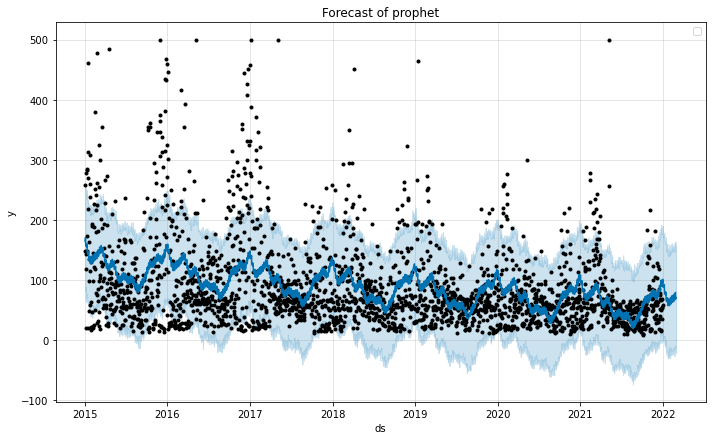

In [4]:
import pandas as pd
from prophet import Prophet
import numpy as np
import os
import sys
sys.path.append('../')
import config
df = pd.read_csv('../../data/data_daily_with_aqi.csv')
target = 'AQI'
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})
df_tgt_ct = df_tgt_ct[df_tgt_ct.ds<'2022-01-01']

fraction = 1
y_train = df_tgt_ct[:int(len(df_tgt_ct)*fraction)]
y_val = df_tgt_ct[int(len(df_tgt_ct)*fraction):]

m = Prophet()
m.fit(y_train)

future = m.make_future_dataframe(periods=60)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(12,6))
m.plot(forecast)
plt.legend()
plt.title('Forecast of {}'.format('prophet'))
plt.show()


In [5]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,126.580741,80.027241,250.537972,126.580741,126.580741,38.247737,38.247737,38.247737,0.917890,0.917890,0.917890,37.329847,37.329847,37.329847,0.0,0.0,0.0,164.828478
1,2015-01-03,126.548580,88.750509,259.127298,126.548580,126.548580,43.879648,43.879648,43.879648,7.378126,7.378126,7.378126,36.501522,36.501522,36.501522,0.0,0.0,0.0,170.428228
2,2015-01-04,126.516419,66.573100,246.790517,126.516419,126.516419,31.465097,31.465097,31.465097,-4.007517,-4.007517,-4.007517,35.472614,35.472614,35.472614,0.0,0.0,0.0,157.981516
3,2015-01-05,126.484258,70.524227,246.151348,126.484258,126.484258,29.991129,29.991129,29.991129,-4.267089,-4.267089,-4.267089,34.258218,34.258218,34.258218,0.0,0.0,0.0,156.475386
4,2015-01-06,126.452097,63.788701,243.210495,126.452097,126.452097,29.699443,29.699443,29.699443,-3.177140,-3.177140,-3.177140,32.876583,32.876583,32.876583,0.0,0.0,0.0,156.151540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2022-02-25,54.992411,-17.967692,162.199919,54.985495,55.000029,17.441390,17.441390,17.441390,0.917890,0.917890,0.917890,16.523500,16.523500,16.523500,0.0,0.0,0.0,72.433801
2564,2022-02-26,54.970284,-12.194017,164.415091,54.962742,54.978123,24.485212,24.485212,24.485212,7.378126,7.378126,7.378126,17.107086,17.107086,17.107086,0.0,0.0,0.0,79.455495
2565,2022-02-27,54.948156,-14.302906,159.456876,54.940245,54.956204,13.724267,13.724267,13.724267,-4.007517,-4.007517,-4.007517,17.731784,17.731784,17.731784,0.0,0.0,0.0,68.672423
2566,2022-02-28,54.926028,-21.670558,149.651815,54.917824,54.934365,14.126505,14.126505,14.126505,-4.267089,-4.267089,-4.267089,18.393594,18.393594,18.393594,0.0,0.0,0.0,69.052534


In [6]:
y_train

,ds,y
4,2015-01-02,NaN
9,2015-01-02,149.0
14,2015-01-03,NaN
19,2015-01-03,258.0
24,2015-01-04,NaN
...,...,...
14204,2021-12-27,56.0
14209,2021-12-28,69.0
14214,2021-12-29,53.0
14219,2021-12-30,35.0


In [64]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(18,6))
tick_spacing = 5 #1代表连续打印，n代表没n个打印一次
#plt.xticks(y_train['ds'][-30:],color='blue',tick_spacing=tick_spacing,rotation=90)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.plot(y_train['ds'][-30:],y_train['y'][-30:],label='True Value')
plt.plot(pd.date_range(start= '2022-01-01', end= '2022-03-01',freq='D'),forecast['yhat'][-60:],label='Prophet forecast')
plt.legend()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 1296x432 with 1 Axes>

In [63]:

from datetime import datetime
import pytz # $ pip install pytz

timestamp = 0 # seconds since the Epoch
local_dt = datetime.fromtimestamp(timestamp, pytz.timezone('US/Pacific'))

In [66]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(0,0)
ax.plot(y_train['ds'][-30:],y_train['y'][-30:],label='True Value')


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 1152x864 with 0 Axes>

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


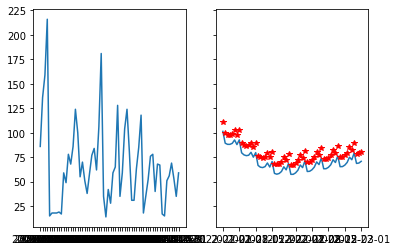

In [78]:

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
ax[0].plot(y_train['ds'][-60:],y_train['y'][-60:],label='True Value')
ax[1].plot(pd.date_range(start= '2022-01-01', end= '2022-03-01',freq='D'),forecast['yhat'][-60:],label='Prophet forecast')
ax[1].plot(pd.date_range(start= '2022-01-01', end= '2022-03-01',freq='D'),forecast['yhat'][-60:]+10,'r*',label='Prophet forecast',)